   State       Id            Name  Year Gender  Count
4     CA   643322      Michael-CA  1990      M   8238
34    NY  3820820      Michael-NY  1990      M   6158
43    TX  5023162      Michael-TX  1990      M   4053
9     FL  1118916      Michael-FL  1990      M   3491
38    PA  4400307      Michael-PA  1990      M   3449
14    IL  1700838      Michael-IL  1990      M   3435
35    OH  4022151      Michael-OH  1990      M   2936
31    NJ  3451542      Michael-NJ  1990      M   2875
22    MI  2610737      Michael-MI  1990      M   2590
19    MA  2298911      Michael-MA  1990      M   2142
10    GA  1296605  Christopher-GA  1990      M   1719
27    NC  3159699  Christopher-NC  1990      M   1698
45    VA  5272908  Christopher-VA  1990      M   1499
20    MD  2400138      Michael-MD  1990      M   1338
15    IN  1844509      Michael-IN  1990      M   1233
42    TN  4732481       Joshua-TN  1990      M   1205
24    MO  2853825      Michael-MO  1990      M   1150
48    WI  5529126      Micha

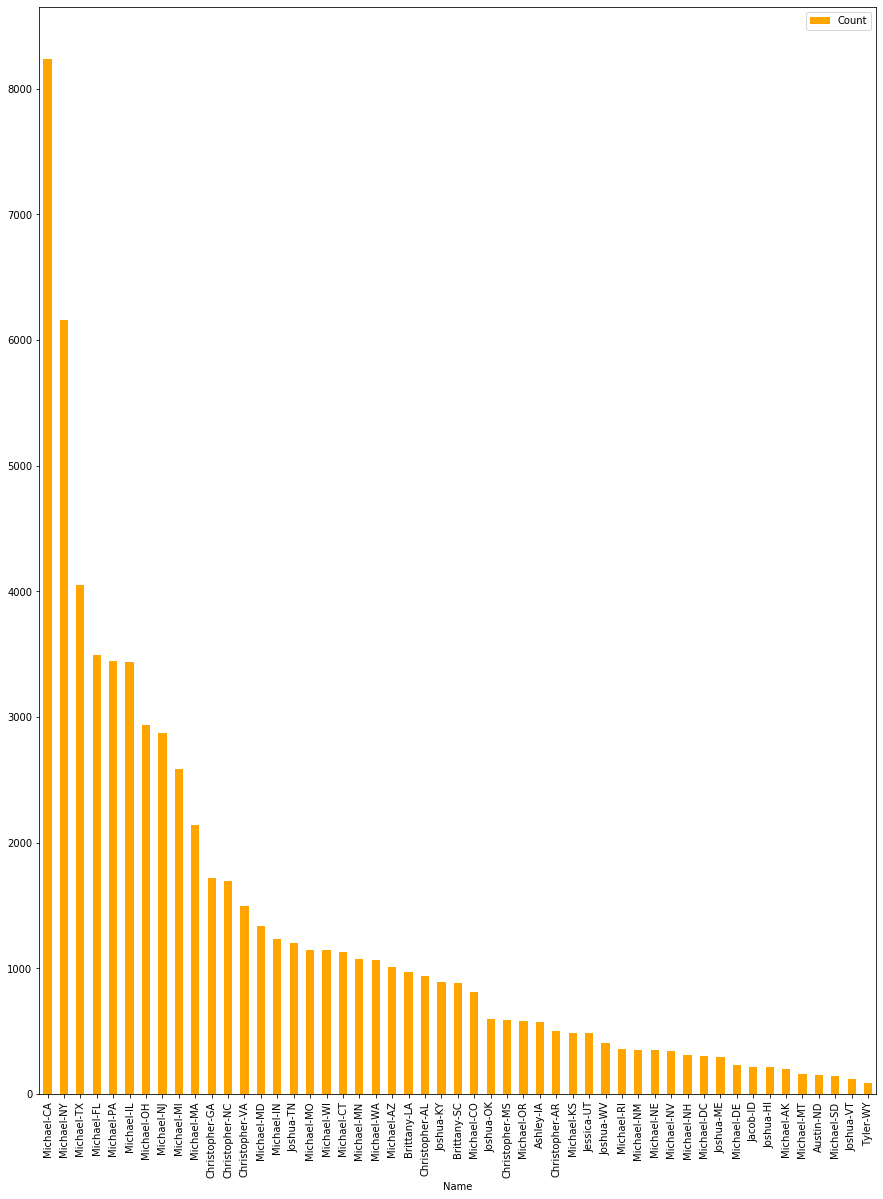

In [1]:
#Import libraries
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
import glob
# Q1. Which name was the most popular in each state before and after 1990 year;
#Read file
df= pd.read_csv('/Users/Lisa/StateNames.csv')
#Sort by Count and name
df.sort_values(by=['Count','Name','Year'],ascending=False)
#Split table 'before and after 1990' and create two dataframes
after1990=df[df['Year'] >=1990]
before1990=df[df[ 'Year'] <= 1990]
#Vizualize the most popular name after 1990 
n_by_state=after1990.groupby(['State','Name'], as_index=False)['Count']#.aggregate({'Count' : 'sum'})
af_1990 = after1990.sort_values(by=['Count'],ascending=False)
sorted_df=af_1990.groupby('State', as_index=False).first()
sorted_df= sorted_df.sort_values('Count',ascending=False)
sorted_df['Name'] = sorted_df[['Name', 'State']].agg('-'.join, axis=1)
print(sorted_df)
ax=sorted_df.plot.bar(x='Name', y='Count',rot=90, figsize=(15,20),color='orange')

   State       Id         Name  Year Gender  Count
34    NY  3772925    Robert-NY  1947      M  10023
4     CA   592966   Michael-CA  1956      M   8268
38    PA  4247118      Mary-PA  1918      F   8184
14    IL  1670620   Michael-IL  1957      M   6220
35    OH  3890325     Linda-OH  1947      F   5881
43    TX  4789444     Linda-TX  1947      F   5060
22    MI  2587063   Michael-MI  1957      M   4924
19    MA  2281385    Robert-MA  1947      M   3895
27    NC  3133390     James-NC  1947      M   3884
31    NJ  3434785      John-NJ  1964      M   3699
9     FL  1118916   Michael-FL  1990      M   3491
42    TN  4710844     James-TN  1947      M   3279
10    GA  1269359     James-GA  1947      M   3066
1     AL   113519     James-AL  1947      M   3038
15    IN  1751662     Linda-IN  1947      F   3012
24    MO  2762751     Linda-MO  1947      F   2797
45    VA  5249833     James-VA  1947      M   2676
17    KY  2032288     James-KY  1947      M   2553
48    WI  5513762     David-WI 

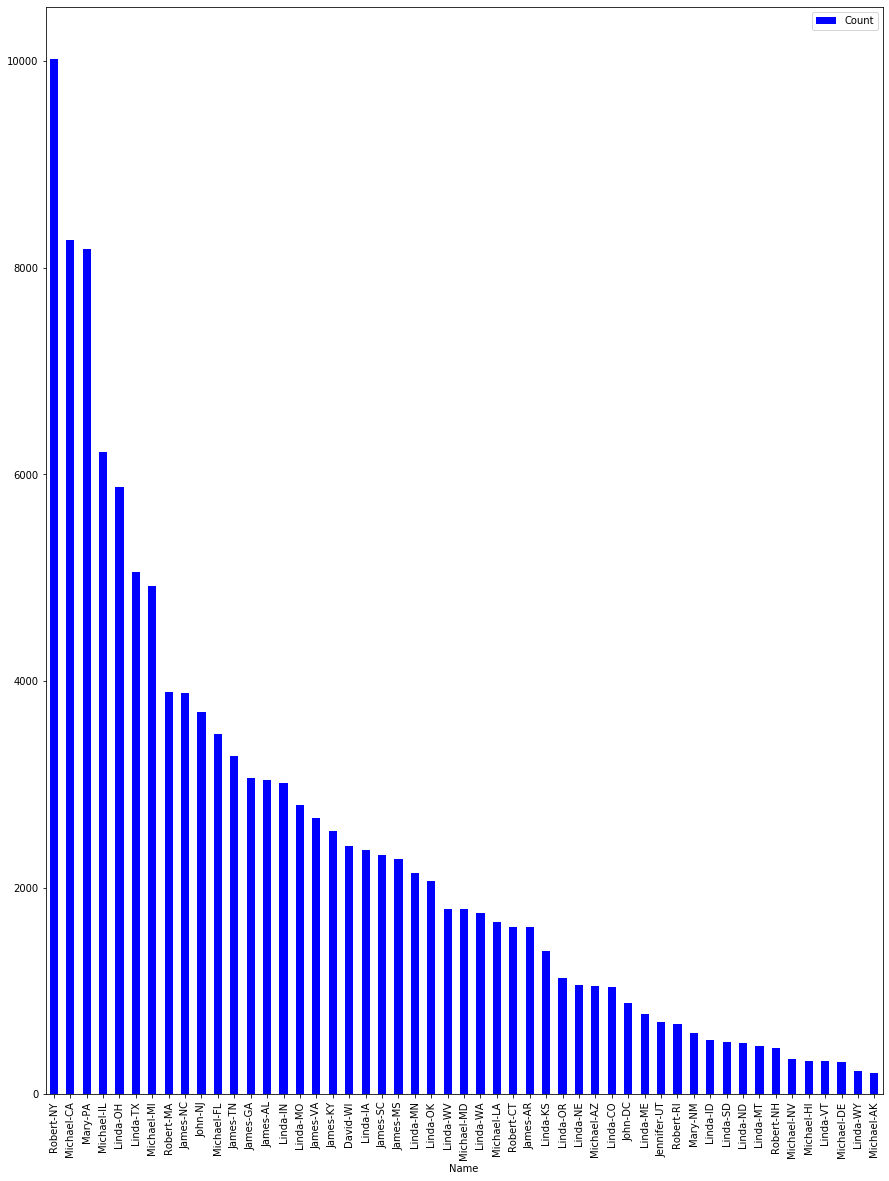

In [2]:
#Vizualize the most popular name before 1990 
n_by_state=before1990.groupby(['State','Name'], as_index=False)['Count']#.aggregate({'Count' : 'sum'})
bf_1990 = before1990.sort_values(by=['Count'],ascending=False)
sorted_df_b=bf_1990.groupby('State', as_index=False).first()
sorted_df_b= sorted_df_b.sort_values('Count',ascending=False)
sorted_df_b['Name'] = sorted_df_b[['Name', 'State']].agg('-'.join, axis=1)
print(sorted_df_b)
ax=sorted_df_b.plot.bar(x='Name', y='Count',rot=90, figsize=(15,20),color='blue')

  State       Id        Name  Year Gender  Count
0    CA   472353  Jessica-CA  1991      F   6949
1    NY  3688618  Jessica-NY  1990      F   2909
2    WY  5630967   Ashley-WY  1990      F     73


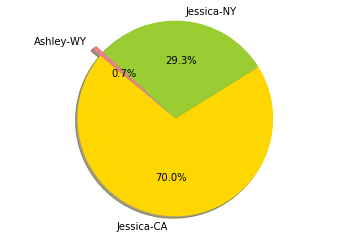

In [3]:
#Q2 Which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you
#Selecting time range and gender
df = df[df['Year'].between(1990, 2000)]
df_F=df.query('Gender=="F"')
df_M=df.query('Gender=="M"')
subset = ['WY', 'CA', 'NY']
#Sort for Females
df_F = df_F.loc[df['State'].isin(subset)]
n_by_state=df_F.groupby(['State','Name'], as_index=False)['Count']#.aggregate({'Count' : 'sum'})
df_F = df_F.sort_values(by=['Count'],ascending=False)
sorted_df=df_F.groupby('State', as_index=False).first()
sorted_df= sorted_df.sort_values('Count',ascending=False)
sorted_df['Name'] = sorted_df[['Name', 'State']].agg('-'.join, axis=1)
print(sorted_df)


#Vizualizing
# Data to plot
labels = 'Jessica-CA', 'Jessica-NY', 'Ashley-WY'
sizes = [6949, 2909, 73]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

  State       Id        Name  Year Gender  Count
0    CA   643322  Michael-CA  1990      M   8238
1    NY  3820820  Michael-NY  1990      M   6158
2    WY  5643973    Tyler-WY  1993      M     90


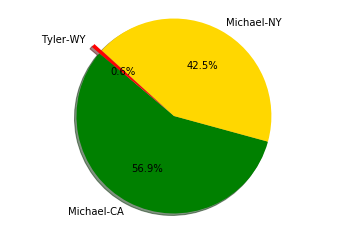

In [4]:
#Sort for Males
subset = ['WY', 'CA', 'NY']
df_M = df_M.loc[df['State'].isin(subset)]
n_by_state=df_M.groupby(['State','Name'], as_index=False)['Count']#.aggregate({'Count' : 'sum'})
df_M = df_M.sort_values(by=['Count'],ascending=False)
sorted_df=df_M.groupby('State', as_index=False).first()
sorted_df= sorted_df.sort_values('Count',ascending=False)
sorted_df['Name'] = sorted_df[['Name', 'State']].agg('-'.join, axis=1)
print(sorted_df)

#Vizualizing
# Data to plot
labels = 'Michael-CA', 'Michael-NY', 'Tyler-WY'
sizes = [8238, 6158, 90]
colors = ['green', 'gold', 'red']
explode = (0, 0, 0.1)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


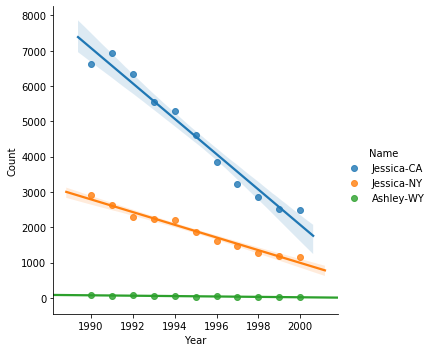

In [5]:
#Q3 dynamics of three names selected by you in those three states starting from 1990 year.
#Filter time period and gender=F
after1990=df[df['Year'] >=1990]
df_F=after1990.query('Gender=="F"')
df['Name'] = df[['Name', 'State']].agg('-'.join, axis=1)
subset = ['WY', 'CA', 'NY']
df_F = df_F.loc[df['State'].isin(subset)]
subset_names=['Jessica-CA', 'Jessica-NY', 'Ashley-WY']
df_F = df_F.loc[df['Name'].isin(subset_names)]
#Vizualize for Females
sns.lmplot(x="Year", y="Count", hue="Name", data=df_F);

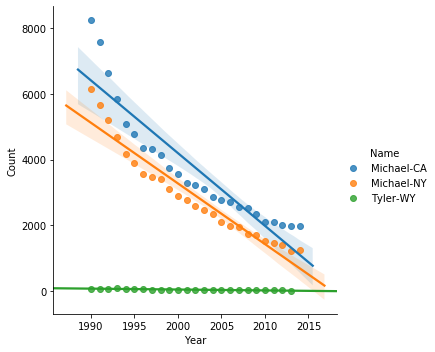

In [14]:
#Filter time period and gender for Gender=M
df= pd.read_csv('/Users/Lisa/StateNames.csv')
after1990=df[df['Year'] >=1990]
df_M=after1990.query('Gender=="M"')
array = ['WY', 'CA', 'NY']
df_M = df_M.loc[df['State'].isin(array)]
df['Name'] = df[['Name', 'State']].agg('-'.join, axis=1)
subset_names=['Tyler-WY','Michael-CA','Michael-NY']
df_M = df_M.loc[df['Name'].isin(subset_names)]
df_M['Name'] = df_M[['Name', 'State']].agg('-'.join, axis=1)
#Vizualize
sns.lmplot(x="Year", y="Count", hue="Name", data=df_M);